c:\Users\yven7\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yven7\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yven7\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yven7\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: Undefi

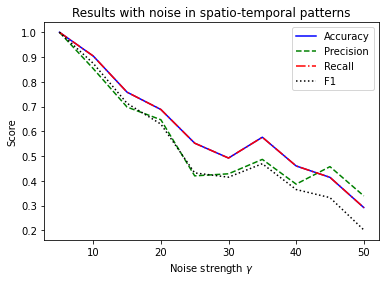

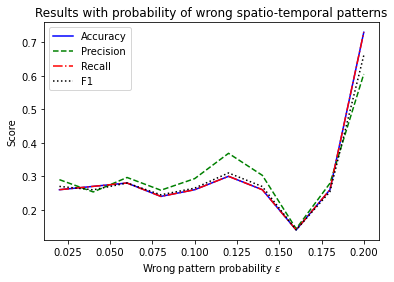

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

original_map = np.load("original_map/area_map.npy")


original_map = original_map.reshape((original_map.shape[0]*original_map.shape[1]))
#print(original_map)

#print(original_map[np.array([5,6,7,8,9])])
#steps basically:
# flatten the clusters
# create prediction map from cluster map, use the cluster center as the label
# get the metrics

pattern_chances = np.linspace(0.02, 0.2, 10)
pattern_chances = pattern_chances.tolist()

noise_strengths = np.linspace(5,50,10)
noise_strengths = noise_strengths.tolist()

#print(pattern_chances)
#print(noise_strengths)

noise_accuracies = []
noise_precisions = []
noise_recalls = []
noise_fscores = []

pattern_accuracies = []
pattern_precisions = []
pattern_recalls = []
pattern_fscores = []


for ns in noise_strengths:
    accuracies = []
    precisions = []
    recalls = []
    fscores = [] 
    # average the metric over the mutiple runs
    for run in range(5):
        #open the clusters and the cluster center files
        test_clusters = np.load(f"results_noise_run_{run}/noise_strength_{ns}_clusters.npy", allow_pickle=True)
        test_cluster_centers = np.load(f"results_noise_run_{run}/noise_strength_{ns}_cluster_center_final.npy", allow_pickle=True)

        #print(test_cluster_centers)
        #print(test_clusters)

        # get the label for each cluster 
        labels = original_map[test_cluster_centers]

        # create the predicted ,map
        prediction_map = np.zeros(100)
        for i in range(test_clusters.shape[0]):
            prediction_map[test_clusters[i]] = labels[i]

        # make sure it is the same time as the original map
        prediction_map = prediction_map.astype("int32")
        acc = accuracy_score(original_map, prediction_map)
        recall = recall_score(original_map, prediction_map, average='weighted')
        precision = precision_score(original_map, prediction_map, average='weighted')
        f1 = f1_score(original_map, prediction_map, average='weighted')

        accuracies.append(acc)
        precisions.append(precision)
        recalls.append(recall)
        fscores.append(f1)

    avg_acc = np.mean(accuracies)
    avg_recall = np.mean(recalls)
    avg_precision = np.mean(precisions)
    avg_f = np.mean(fscores)

    noise_accuracies.append(avg_acc)
    noise_precisions.append(avg_precision)
    noise_recalls.append(avg_recall)
    noise_fscores.append(avg_f)


for ps in pattern_chances:
    accuracies = []
    precisions = []
    recalls = []
    fscores = [] 
    # average the metric over the mutiple runs
    for run in range(5):
        #open the clusters and the cluster center files
        test_clusters = np.load(f"results_wrong_patterns_run_0/wrong_pattern_chance_{ps}_clusters.npy", allow_pickle=True)
        test_cluster_centers = np.load(f"results_wrong_patterns_run_0/wrong_pattern_chance_{ps}_cluster_center_final.npy", allow_pickle=True)

        #print(test_cluster_centers)
        #print(test_clusters)

        # get the label for each cluster 
        labels = original_map[test_cluster_centers]

        # create the predicted ,map
        prediction_map = np.zeros(100)
        for i in range(test_clusters.shape[0]):
            prediction_map[test_clusters[i]] = labels[i]

        # make sure it is the same time as the original map
        prediction_map = prediction_map.astype("int32")
        acc = accuracy_score(original_map, prediction_map)
        recall = recall_score(original_map, prediction_map, average='weighted')
        precision = precision_score(original_map, prediction_map, average='weighted')
        f1 = f1_score(original_map, prediction_map, average='weighted')

        accuracies.append(acc)
        precisions.append(precision)
        recalls.append(recall)
        fscores.append(f1)

    avg_acc = np.mean(accuracies)
    avg_recall = np.mean(recalls)
    avg_precision = np.mean(precisions)
    avg_f = np.mean(fscores)

    pattern_accuracies.append(avg_acc)
    pattern_precisions.append(avg_precision)
    pattern_recalls.append(avg_recall)
    pattern_fscores.append(avg_f)


#data_noise = np.array([noise_accuracies, noise_precisions, noise_recalls, noise_fscores])
#data_noise = np.transpose(data_noise, x=noise_strengths)
#print(data_noise)


plt.plot(noise_strengths, noise_accuracies, 'b' ,label='Accuracy')
plt.plot(noise_strengths, noise_precisions, '--g' ,label='Precision')
plt.plot(noise_strengths, noise_recalls, '-.r' ,label='Recall')
plt.plot(noise_strengths, noise_fscores, ':k' ,label='F1')
plt.xlabel("Noise strength $\gamma$")
plt.ylabel("Score")
plt.legend(loc="upper right")
plt.title("Results with noise in spatio-temporal patterns")
#plt.show()
plt.savefig("figures/results_noise_only.pdf", format="pdf")
#sns.lineplot(data=data_noise)
#pattern_accuracies = []
#pattern_precisions = []
#pattern_recalls = []
#pattern_fscores = []
plt.show()

plt.plot(pattern_chances, pattern_accuracies, 'b' ,label='Accuracy')
plt.plot(pattern_chances, pattern_precisions, '--g' ,label='Precision')
plt.plot(pattern_chances, pattern_recalls, '-.r' ,label='Recall')
plt.plot(pattern_chances, pattern_fscores, ':k' ,label='F1')
plt.xlabel("Wrong pattern probability $\epsilon$")
plt.ylabel("Score")
plt.legend(loc="upper left")
plt.title("Results with probability of wrong spatio-temporal patterns")
#plt.show()
plt.savefig("figures/results_wrong_patterns_only.pdf", format="pdf")